In [1]:
import os
import re
import pandas as pd
import nltk as nl
import numpy as np 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Импорт набора данных из sklearn

In [5]:
categories = [
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'soc.religion.christian'

]

data_train= fetch_20newsgroups(subset='train',
                               categories=categories,
                               shuffle=True,
                               random_state=42,
                              )
data_train.filenames.shape
print(data_train.target[:10])

for t in data_train.target[:10]:
    print(data_train.target_names[t])

[4 1 1 1 1 1 5 1 2 3]
sci.crypt
rec.motorcycles
rec.motorcycles
rec.motorcycles
rec.motorcycles
rec.motorcycles
soc.religion.christian
rec.motorcycles
rec.sport.baseball
rec.sport.hockey


# Визуализация категорий 20newsgroups 

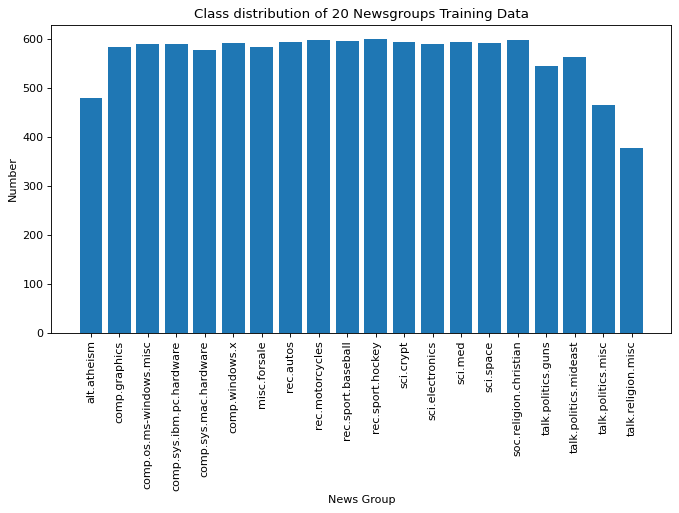

In [6]:
data_train= fetch_20newsgroups(subset='train',
                               shuffle=True,
                               random_state=42,
                              )
data_train.target_names

#The visualization of the number of various categories
targets, frequency = np.unique(data_train.target, return_counts=True)
targets_str = np.array(data_train.target_names)
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(targets_str, frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Number')
plt.show()

# Работа с 6 самыми многочисленными классами

In [3]:
categories = [
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'soc.religion.christian'

]

data_train=fetch_20newsgroups(subset='train',
                               categories=categories,
                               shuffle=True,
                               random_state=42,
                              )

data_test=fetch_20newsgroups(subset='test',
                             categories=categories,
                             shuffle=True,
                             random_state=42,
                            )

 # Разделение тренировочных и тестовых данных
x_train=data_train.data
x_test=data_test.data
y_train=data_train.target
y_test=data_test.target

df_train = pd.DataFrame({'article': x_train, 'label': y_train})
df_train.head()

# df_train.shape

,article,label
0,From: bear@kestrel.fsl.noaa.gov (Bear Giles)\n...,4
1,From: dean@fringe.rain.com (Dean Woodward)\nSu...,1
2,From: Clarke@bdrc.bd.com (Richard Clarke)\nSub...,1
3,From: cbrooks@ms.uky.edu (Clayton Brooks)\nSub...,1
4,From: prb@access.digex.com (Pat)\nSubject: Re:...,1


In [4]:
df_test = pd.DataFrame({'article': x_test, 'label': y_test})
df_test.head()

# df_test.shape

,article,label
0,From: jmelchi@sage.cc.purdue.edu (moi)\nSubjec...,2
1,From: franjion@spot.Colorado.EDU (John Franjio...,2
2,From: lbr@holos0.uucp (Len Reed)\nSubject: Re:...,2
3,From: behanna@syl.nj.nec.com (Chris BeHanna)\n...,1
4,From: wynblatt@sbgrad5.cs.sunysb.edu (Michael ...,2


# Распределение слов во всем наборе данных

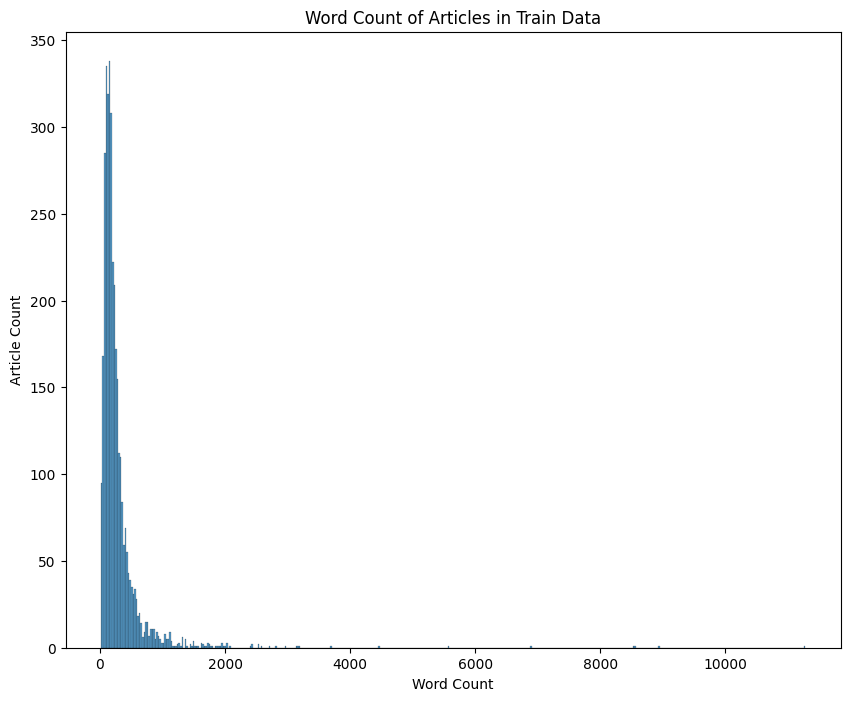

,article,label,word_count
0,From: bear@kestrel.fsl.noaa.gov (Bear Giles)\n...,4,260
1,From: dean@fringe.rain.com (Dean Woodward)\nSu...,1,352
2,From: Clarke@bdrc.bd.com (Richard Clarke)\nSub...,1,72
3,From: cbrooks@ms.uky.edu (Clayton Brooks)\nSub...,1,121
4,From: prb@access.digex.com (Pat)\nSubject: Re:...,1,43


In [5]:
df_train['word_count'] = df_train['article'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,8))
sns.histplot(data=df_train, x='word_count')
plt.title('Word Count of Articles in Train Data')
plt.xlabel('Word Count')
plt.ylabel('Article Count')
plt.show()
df_train.head()

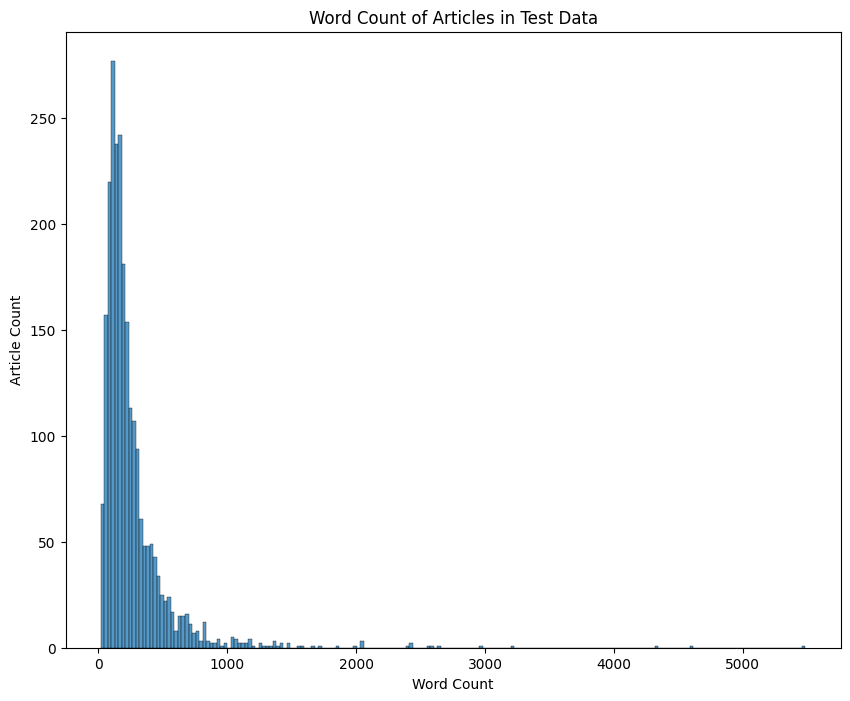

,article,label,word_count
0,From: jmelchi@sage.cc.purdue.edu (moi)\nSubjec...,2,28
1,From: franjion@spot.Colorado.EDU (John Franjio...,2,230
2,From: lbr@holos0.uucp (Len Reed)\nSubject: Re:...,2,346
3,From: behanna@syl.nj.nec.com (Chris BeHanna)\n...,1,126
4,From: wynblatt@sbgrad5.cs.sunysb.edu (Michael ...,2,280


In [26]:
df_test['word_count'] = df_test['article'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,8))
sns.histplot(data=df_test, x='word_count')
plt.title('Word Count of Articles in Test Data')
plt.xlabel('Word Count')
plt.ylabel('Article Count')
plt.show()
df_test.head()

# Очистка и предварительная обработка данных

In [6]:
def clean_text (text):
    # Удаление пробелов до и после
    text = str(text).strip()
     
    # Перевод текста в нижний регистр 
    text = str(text).lower()
 
    # Замена символов новой строки пробелами
    text = re.sub(r"\n", r" ", text)
         
    # Токенизация
    word_tokens = word_tokenize(text)
     
    # Список стоп-слов
    stop_words = stopwords.words('english')
     
    # Удаление стоп-слов и слов, содержащих меньше 2 букв
    text_tokens = [word for word in word_tokens if (len(word) > 2) and (word not in stop_words)]
    
    return text

df_train['article'] = df_train['article'].apply(lambda x: clean_text(x))
df_test['article'] = df_test['article'].apply(lambda x: clean_text(x))

 # Разделение тренировочных и тестовых данных 

X_train = df_train['article']
y_train = df_train['label']
X_test = df_test['article']
y_test = df_test['label']


# Мешок слов (Bag of words) 

Количество функций, замеченных во время подгонки:  44194


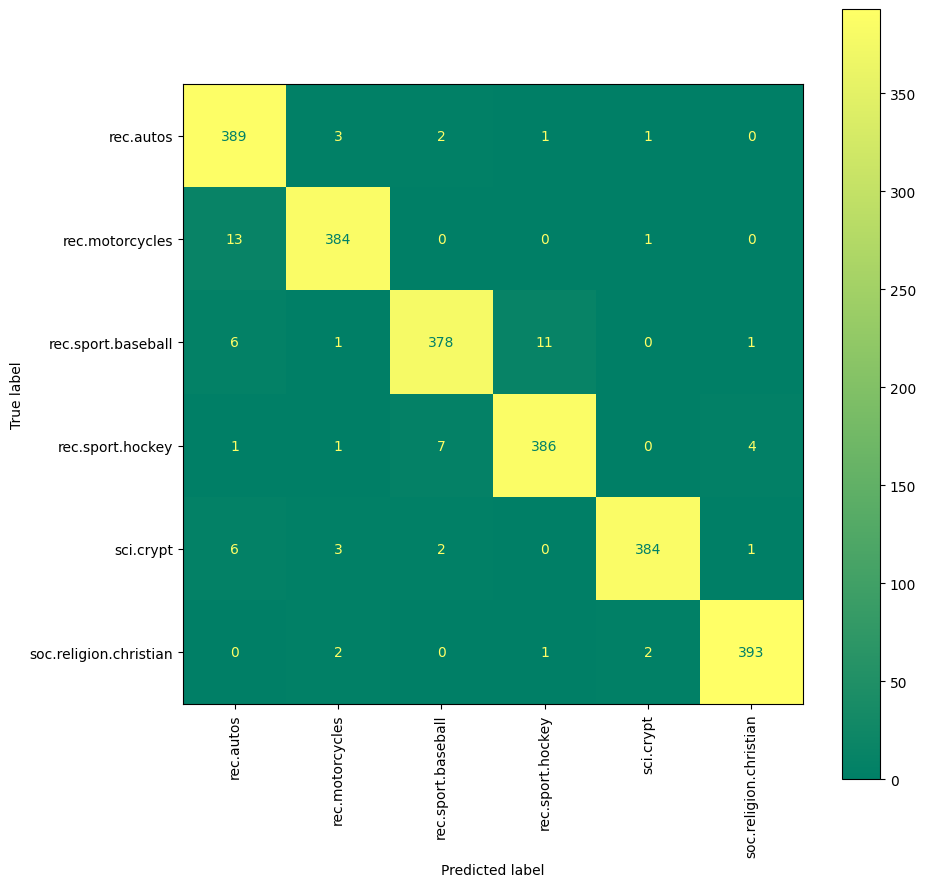

Точность модели обучения функции, извлеченная CountVectorizer без удаления стоп-слов: 0.9706375838926175
Более подробные показатели оценки: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       396
           1       0.97      0.96      0.97       398
           2       0.97      0.95      0.96       397
           3       0.97      0.97      0.97       399
           4       0.99      0.97      0.98       396
           5       0.98      0.99      0.99       398

    accuracy                           0.97      2384
   macro avg       0.97      0.97      0.97      2384
weighted avg       0.97      0.97      0.97      2384



In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

 # Использование общей статистики CountVectorizer для извлечения векторов объектов
 # Конфигурация по умолчанию не удаляет стоп-слова
count_vec=CountVectorizer()

x_count_train = count_vec.fit_transform(x_train)
x_count_test = count_vec.transform(x_test)

 # Использование наивного байесовского классификатора
 # Извлечение векторов признаков для общей статистики CountVectorizer обучения и прогнозирования
mnb_count = MultinomialNB()
mnb_count.fit(x_count_train, y_train)      # Учить 
mnb_count_y_predict = mnb_count.predict(x_count_test)      # Прогноз
print("Количество функций, замеченных во время подгонки: ", mnb_count.n_features_in_)
 
 # Матрица ошибок
cm = confusion_matrix(y_test,mnb_count_y_predict )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()
  # Оценка модели
print("Точность модели обучения функции, извлеченная CountVectorizer без удаления стоп-слов:", mnb_count.score(x_count_test, y_test))
print("Более подробные показатели оценки: \n", classification_report(y_test,mnb_count_y_predict))


Количество функций, замеченных во время подгонки:  43884


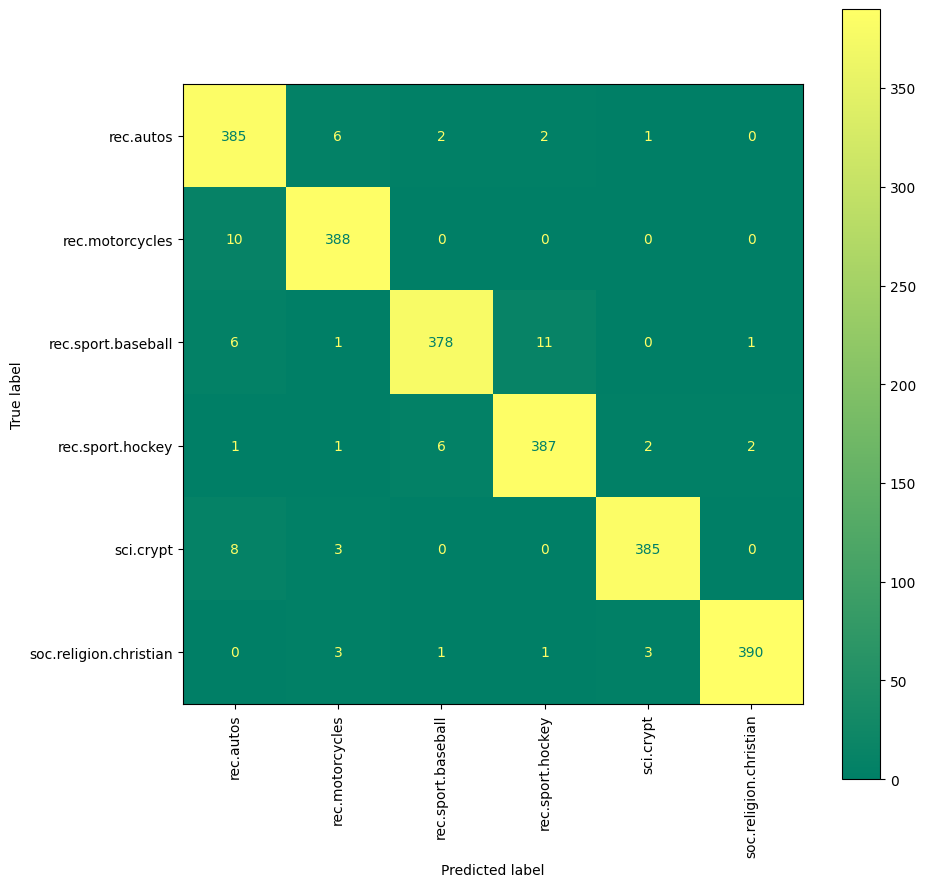

Точность модели обучения функции, извлеченная CountVectorizer с удалением стоп-слов: 0.9702181208053692
Более подробные показатели оценки: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       396
           1       0.97      0.97      0.97       398
           2       0.98      0.95      0.96       397
           3       0.97      0.97      0.97       399
           4       0.98      0.97      0.98       396
           5       0.99      0.98      0.99       398

    accuracy                           0.97      2384
   macro avg       0.97      0.97      0.97      2384
weighted avg       0.97      0.97      0.97      2384



In [12]:
 # Использование общей статистики CountVectorizer для извлечения векторов объектов
 # Удалям стоп-слова

count_vec_stop=CountVectorizer(analyzer='word', stop_words='english')
x_count_stop_train = count_vec_stop.fit_transform(x_train)
x_count_stop_test = count_vec_stop.transform(x_test)

 # Использование наивного байесовского классификатора
 # Извлечение векторов признаков для общей статистики CountVectorizer с удалением стоп-слов 

mnb_count_stop = MultinomialNB()
mnb_count_stop.fit(x_count_stop_train, y_train)      # Учить 
mnb_count_stop_y_predict = mnb_count_stop.predict(x_count_stop_test)      # Прогноз
print("Количество функций, замеченных во время подгонки: ", mnb_count_stop.n_features_in_)

 # Матрица ошибок
cm = confusion_matrix(y_test,mnb_count_stop_y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

 # Оценка модели
print("Точность модели обучения функции, извлеченная CountVectorizer с удалением стоп-слов:", mnb_count_stop.score(x_count_stop_test, y_test))
print("Более подробные показатели оценки: \n", classification_report(y_test,mnb_count_stop_y_predict))


Количество функций, замеченных во время подгонки:  44194


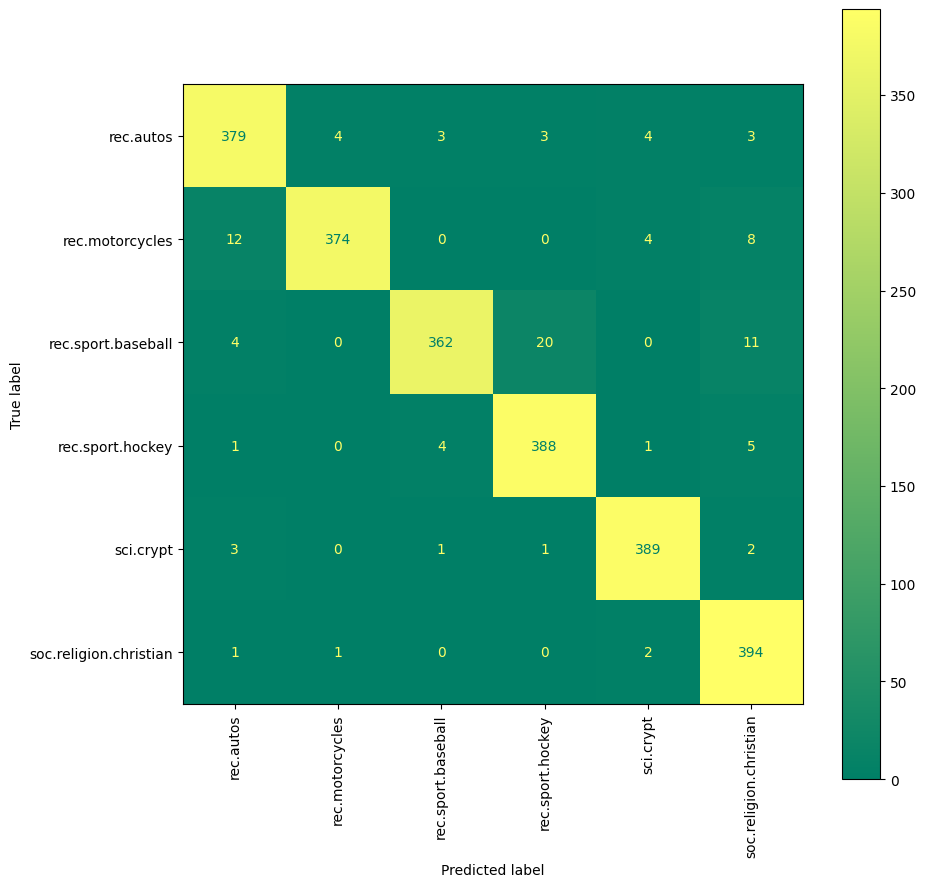

Точность модели обучения функции, извлеченная TfidfVectorizer без удаления стоп-слов: 0.9588926174496645
Более подробные показатели оценки: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       396
           1       0.99      0.94      0.96       398
           2       0.98      0.91      0.94       397
           3       0.94      0.97      0.96       399
           4       0.97      0.98      0.98       396
           5       0.93      0.99      0.96       398

    accuracy                           0.96      2384
   macro avg       0.96      0.96      0.96      2384
weighted avg       0.96      0.96      0.96      2384



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
 # Использование общей статистики TfidfVectorizer для извлечения векторов объектов
 # Конфигурация по умолчанию не удаляет стоп-слова

tfidf_vec = TfidfVectorizer()
x_tfidf_train = tfidf_vec.fit_transform(x_train)
x_tfidf_test = tfidf_vec.transform(x_test)

 # Использование наивного байесовского классификатора
 # Извлечение векторов признаков для общей статистики TfidfVectorizer обучения и прогнозирования

mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(x_tfidf_train, y_train)      # Учить
mnb_tfidf_y_predict = mnb_tfidf.predict(x_tfidf_test)      # Прогноз
print("Количество функций, замеченных во время подгонки: ", mnb_tfidf.n_features_in_)

 # Матрица ошибок
cm = confusion_matrix(y_test,mnb_tfidf_y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

 # Оценка модели
print("Точность модели обучения функции, извлеченная TfidfVectorizer без удаления стоп-слов:", mnb_tfidf.score(x_tfidf_test, y_test))
print("Более подробные показатели оценки: \n", classification_report(y_test,mnb_tfidf_y_predict))


Количество функций, замеченных во время подгонки:  43884


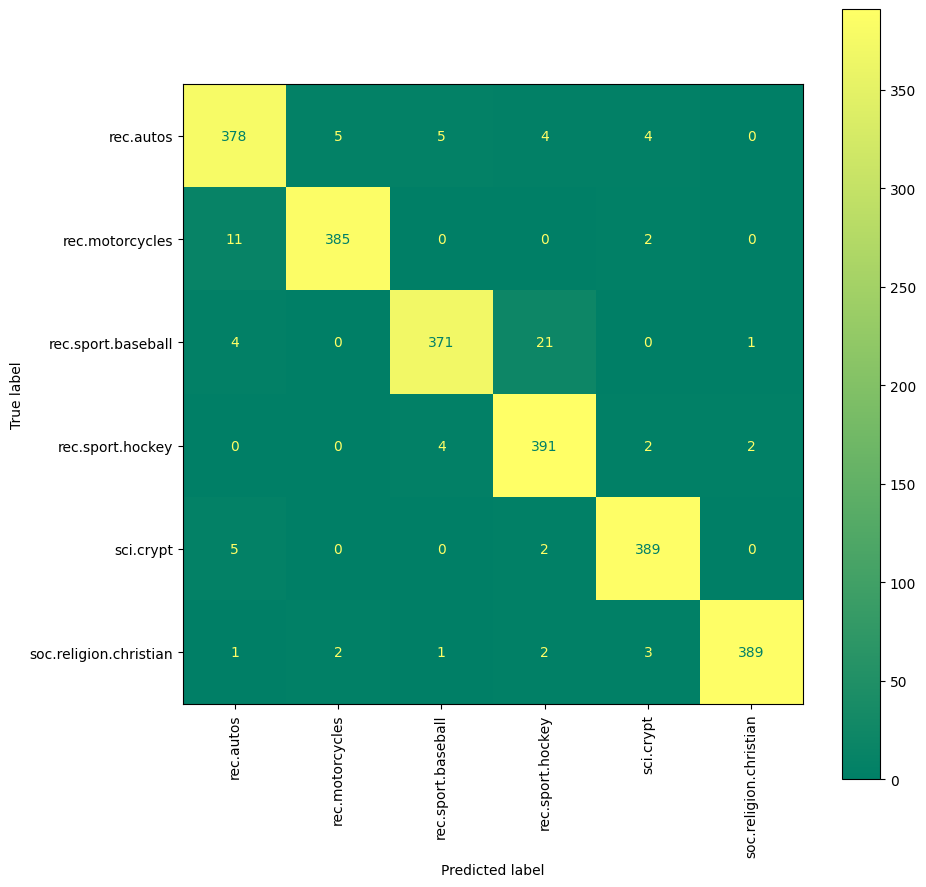

Точность модели обучения функции, извлеченная TfidfVectorizer с удалением стоп-слов: 0.9660234899328859
Более подробные показатели оценки: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       396
           1       0.98      0.97      0.97       398
           2       0.97      0.93      0.95       397
           3       0.93      0.98      0.95       399
           4       0.97      0.98      0.98       396
           5       0.99      0.98      0.98       398

    accuracy                           0.97      2384
   macro avg       0.97      0.97      0.97      2384
weighted avg       0.97      0.97      0.97      2384



In [14]:
 # Использование общей статистики TfidfVectorizer для извлечения векторов объектов
 # Удаляем стоп-слова

tfidf_vec_stop = TfidfVectorizer(analyzer='word', stop_words='english')
x_tfidf_stop_train = tfidf_vec_stop.fit_transform(x_train)
x_tfidf_stop_test = tfidf_vec_stop.transform(x_test)

 # Использование наивного байесовского классификатора
 # Извлечение векторов признаков для общей статистики TfidfVectorizer с удалением стоп-слов

mnb_tfidf_stop = MultinomialNB()
mnb_tfidf_stop.fit(x_tfidf_stop_train, y_train)      # Учить
mnb_tfidf_stop_y_predict = mnb_tfidf_stop.predict(x_tfidf_stop_test)      # Прогноз
print("Количество функций, замеченных во время подгонки: ", mnb_tfidf_stop.n_features_in_)

# Матрица ошибок
cm = confusion_matrix(y_test,mnb_tfidf_stop_y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

  # Оценка модели
print("Точность модели обучения функции, извлеченная TfidfVectorizer с удалением стоп-слов:", mnb_tfidf_stop.score(x_tfidf_stop_test, y_test))
print("Более подробные показатели оценки: \n", classification_report(y_test,mnb_tfidf_stop_y_predict))


# Удаление 'headers', 'footers', 'quotes'

Количество функций, замеченных во время подгонки:  33481


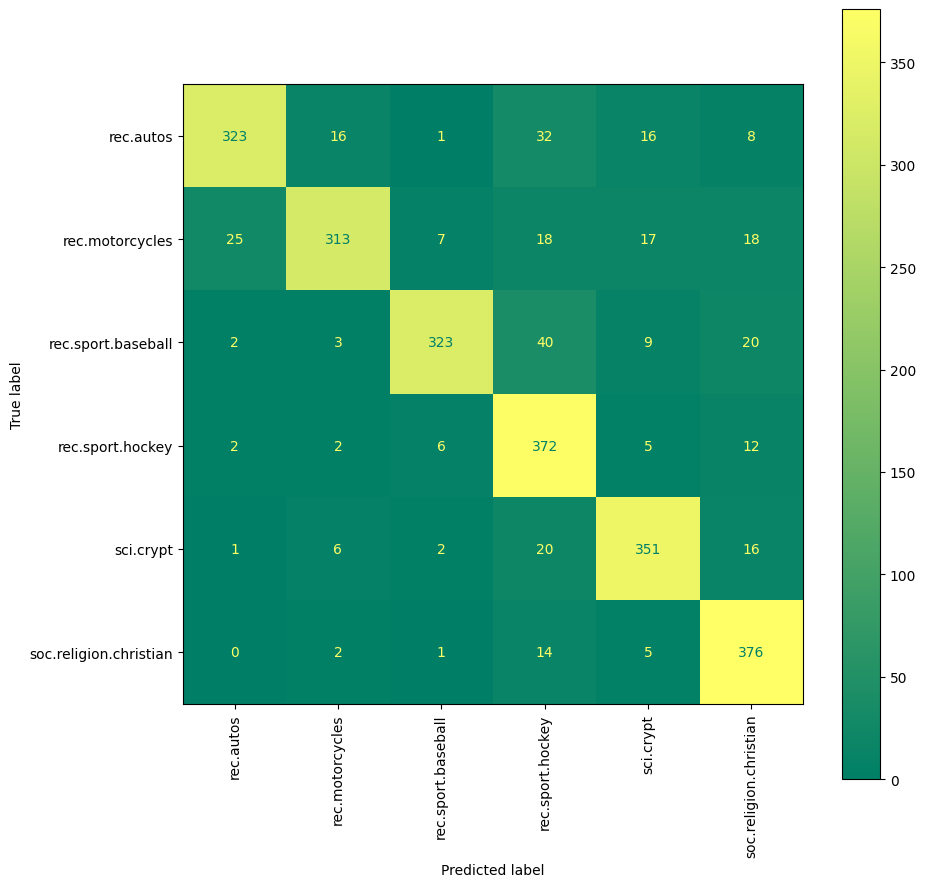

Точность модели обучения функции, извлеченная TfidfVectorizer с удалением стоп-слов: 0.863255033557047
Более подробные показатели оценки: 
               precision    recall  f1-score   support

           0       0.92      0.82      0.86       396
           1       0.92      0.79      0.85       398
           2       0.95      0.81      0.88       397
           3       0.75      0.93      0.83       399
           4       0.87      0.89      0.88       396
           5       0.84      0.94      0.89       398

    accuracy                           0.86      2384
   macro avg       0.87      0.86      0.86      2384
weighted avg       0.87      0.86      0.86      2384



In [16]:
categories = [
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'soc.religion.christian'

]

data_train=fetch_20newsgroups(subset='train',
                               categories=categories,
                               shuffle=True,
                               remove=('headers', 'footers', 'quotes'),
                               random_state=42,
                              )

data_test=fetch_20newsgroups(subset='test',
                             categories=categories,
                             shuffle=True,
                             remove=('headers', 'footers', 'quotes'),
                             random_state=42,
                            )
 # Разделение тренировочных и тестовых данных

x_train=data_train.data
x_test=data_test.data
y_train=data_train.target
y_test=data_test.target

tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
x_tfidf_train = tfidf.fit_transform(x_train)
x_tfidf_test = tfidf.transform(x_test)

NB = MultinomialNB()
NB.fit(x_tfidf_train, y_train)      # Учить
y_predict = NB.predict(x_tfidf_test)      # Прогноз
print("Количество функций, замеченных во время подгонки: ", NB.n_features_in_)

# Матрица ошибок
cm = confusion_matrix(y_test,y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

  # Оценка модели
print("Точность модели обучения функции, извлеченная TfidfVectorizer с удалением стоп-слов:", NB.score(x_tfidf_test, y_test))
print("Более подробные показатели оценки: \n", classification_report(y_test,y_predict))

